In [1]:
import cmath

In [2]:
z = complex(1, 1)
print(z.real)
print(z.imag)
print(cmath.phase(z))
print(cmath.pi/4)

1.0
1.0
0.7853981633974483
0.7853981633974483


In [3]:
# fast fourier transform

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

In [5]:
class signal:
    
    def __init__(self, y, time=None, sample_fs=None):
        self.y = y
        
        self.n_samples = len(self.y)
        
        if time is None and sample_fs is None:
            raise Exception("at least need time or sample_fs")
        elif time:
            self.time = time
            self.sample_fs = int(self.n_samples/self.time)
        else:
            self.sample_fs = sample_fs
            self.time = int(self.n_samples/self.time)
            
        self.x = np.linspace(0, self.n_samples/self.sample_fs, self.n_samples)
        
        self.ft_freq = None
        self.ft_ampl = None
        
    def plot(self, show_interval=500):
        plt.plot(self.x[:show_interval], self.y[:show_interval])
        plt.show()
    
    def fft(self):
        self.ft_freq = np.linspace(0, self.sample_fs, self.n_samples)
        
        yf = scipy.fftpack.fft(self.y)
        self.ft_ampl = 2.0/self.n_samples * np.abs(yf)
        
        # only take half to plot
        plt.plot(self.ft_freq[:self.n_samples//2], self.ft_ampl[:self.n_samples//2])
        plt.show()

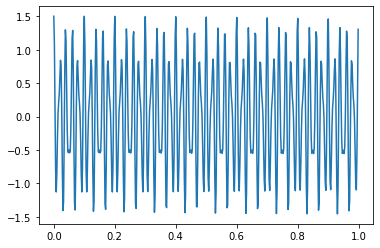

In [6]:
time_interval = 3   # seconds
n_samples = 1500

t = np.linspace(0.0, time_interval, n_samples)

w1 = 50
w2 = 80
y = np.cos(w1 * 2.0*np.pi*t) + 0.5*np.cos(w2 * 2.0*np.pi*t)

# in real cases, we already has t and y. so we do not need n_samples.
sig = signal(y, time=time_interval)
# sig = signal(y, sample_fs=500)

sig.plot()

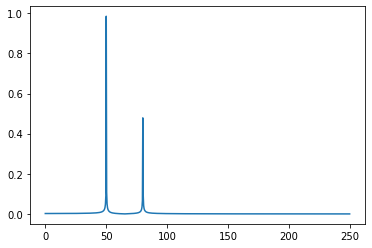

In [7]:
sig.fft()